# Pydy Tuesday 24-06-2025 - Measles data

### 1. Import Libraries

In [61]:
import sys
import pydytuesday
import pandas as pd
import numpy as np

# For Data Visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import plotly
import plotly.graph_objects as go


In [62]:
# See version specifications of packages used (for reproducibility)
print("Python:", sys.version)
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)
print("plotly:", plotly.__version__)

Python: 3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]
pandas: 2.3.0
numpy: 1.26.4
matplotlib: 3.6.2
seaborn: 0.13.2
plotly: 6.1.2


### 2. Load data from the official tidytuesday repo

In [3]:
# Use date to fetch the files for that week
pydytuesday.get_date('2025-06-24')

Trying to fetch README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-06-24/readme.md
Successfully fetched README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-06-24/readme.md
Successfully saved cases_month.csv to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_24062025\cases_month.csv
Successfully saved cases_year.csv to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_24062025\cases_year.csv
Successfully saved meta.yaml to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_24062025\meta.yaml
Successfully saved us_measles.png to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_24062025\us_measles.png


### 3. Load datasets into dataframe and perform initial exploration

In [4]:
# Load datasets using Pandas 
cases_month = pd.read_csv('cases_month.csv')
cases_year = pd.read_csv('cases_year.csv')

# Store all the files in a dictionary
datafiles = {
    "cases_month": cases_month,
    "cases_year": cases_year
}

# Print info for all the files
for filename, df in datafiles.items():
    print(f" {filename} Info: \n")
    print(df.info())
    print("\n" + "-"*60 + "\n")


 cases_month Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22780 entries, 0 to 22779
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   region                 22780 non-null  object 
 1   country                22780 non-null  object 
 2   iso3                   22780 non-null  object 
 3   year                   22780 non-null  int64  
 4   month                  22780 non-null  int64  
 5   measles_suspect        22632 non-null  float64
 6   measles_clinical       22632 non-null  float64
 7   measles_epi_linked     22632 non-null  float64
 8   measles_lab_confirmed  22632 non-null  float64
 9   measles_total          22632 non-null  float64
 10  rubella_clinical       7811 non-null   float64
 11  rubella_epi_linked     7811 non-null   float64
 12  rubella_lab_confirmed  7811 non-null   float64
 13  rubella_total          7811 non-null   float64
 14  discarded              22632 non-

In [ ]:
# Set display width so that the details appear in a single line
pd.set_option('display.width', 1000)

# See some statistical info and sample records of cases_month dataframe
print(cases_month.describe())
print("\n",cases_month.head())

               year         month  measles_suspect  measles_clinical  measles_epi_linked  measles_lab_confirmed  measles_total  rubella_clinical  rubella_epi_linked  rubella_lab_confirmed  rubella_total     discarded
count  22780.000000  22780.000000     22632.000000      22632.000000        22632.000000           22632.000000   22632.000000       7811.000000         7811.000000            7811.000000    7811.000000  22632.000000
mean    2018.253600      6.293547       235.265376         50.708687           38.939069              47.029251     136.677006         19.815901            4.344130              20.066317      44.226347    112.301653
std        3.815709      3.461782      1203.690535        408.194314          748.287331             275.099951     969.226508        283.628969           60.004873             145.382545     335.242009    524.224152
min     2012.000000      1.000000         0.000000       -204.000000            0.000000               0.000000    -195.000000      

In [ ]:
# See some statistical info and sample records of cases_year dataframe
print(cases_year.describe())
print("\n",cases_year.head())

              year  total_population  annualized_population_most_recent_year_only  total_suspected_measles_rubella_cases  measles_total  measles_lab_confirmed  measles_epi_linked  measles_clinical  measles_incidence_rate_per_1000000_total_population  rubella_total  rubella_lab_confirmed  rubella_epi_linked  rubella_clinical  rubella_incidence_rate_per_1000000_total_population  discarded_cases  discarded_non_measles_rubella_cases_per_100000_total_population
count  2382.000000      2.382000e+03                                 2.382000e+03                            2295.000000    2382.000000            2382.000000         2382.000000       2382.000000                                        2382.000000      2382.000000            2382.000000         2382.000000       2382.000000                                        2382.000000        2295.000000                                        1974.000000              
mean   2018.631402      4.269838e+07                                 4.074782e

### 4.a. Visualise Measles case trends by Year

<AxesSubplot: title={'center': 'Measles Total vs Lab Confirmed Over Time'}, xlabel='year'>

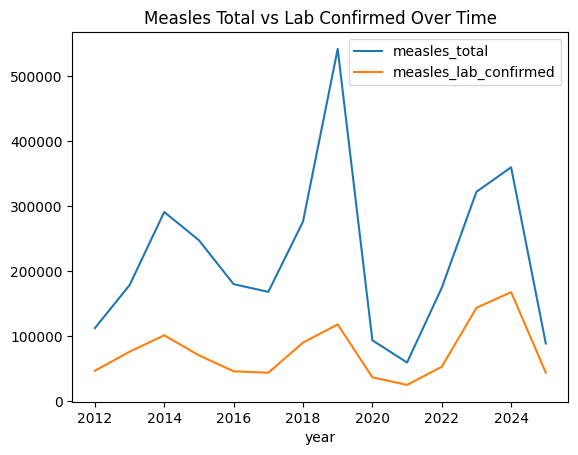

In [ ]:
# Visualise measles trend over time - total measles cases and how many of them were lab-confirmed cases
cases_year.groupby("year")[["measles_total", "measles_lab_confirmed"]].sum().plot(title="Measles Total vs Lab Confirmed Over Time")

Observations:  
- Measles cases globally spiked between 2018 and 2020.
- There is a significant different between the number of total cases and lab-confirmed cases.

### 4.b. Measles case trends over years: Case classification-wise

Case incidents are classified in the following 3 categories:
- Lab-confirmed : Verified through lab testing
- Epi-linked    : Epidemiologically connected to a confirmed case
- Clinical      : Based on symptoms (no lab or epidemiological link)

<AxesSubplot: title={'center': 'Year-wise Composition of Measles Cases'}, xlabel='year'>

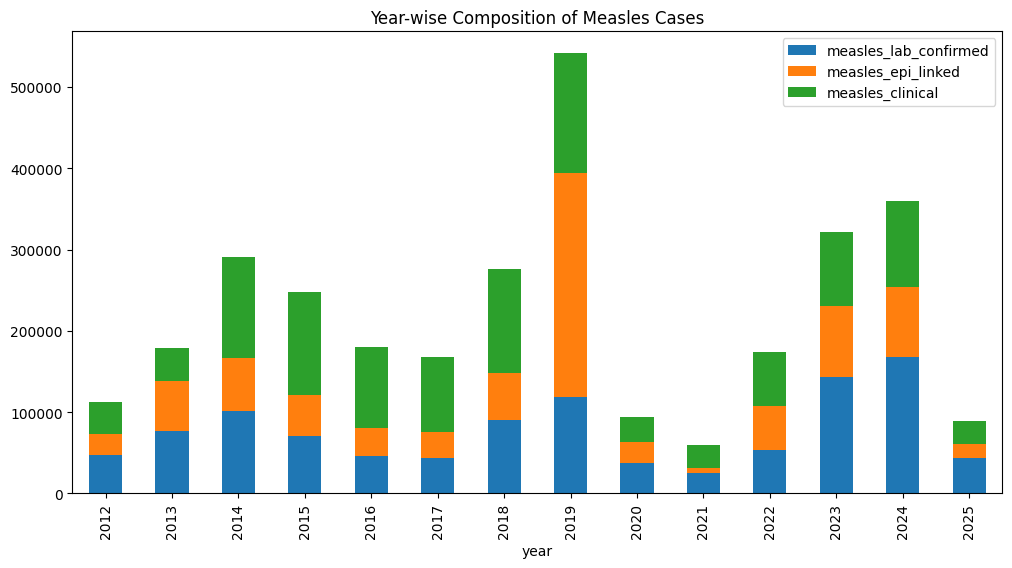

In [ ]:
# Group measles case trends by case classification, over years
yearly_components = cases_year.groupby("year")[["measles_lab_confirmed", "measles_epi_linked", "measles_clinical"]].sum()

# Plot
yearly_components.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    title="Year-wise Composition of Measles Cases"
)


Observations:
- Global measles cases spiked in the year 2019, with the most number of cases being classified as epidemiologically-linked.
- Global cases are on rise since 2021.
- The proportion of lab-confirmed cases seem to have inmproved, indicating better healthcare or disease surveillance systems globally.

### 4.c. Measles cases over years: Region-wise

Data spans 6 WHO regions: AFRO (African), AMRO (American), EURO (European), EMRO (Eastern Mediterranean), SEARO (South-East Asian), and WPRO (Western Pacific)

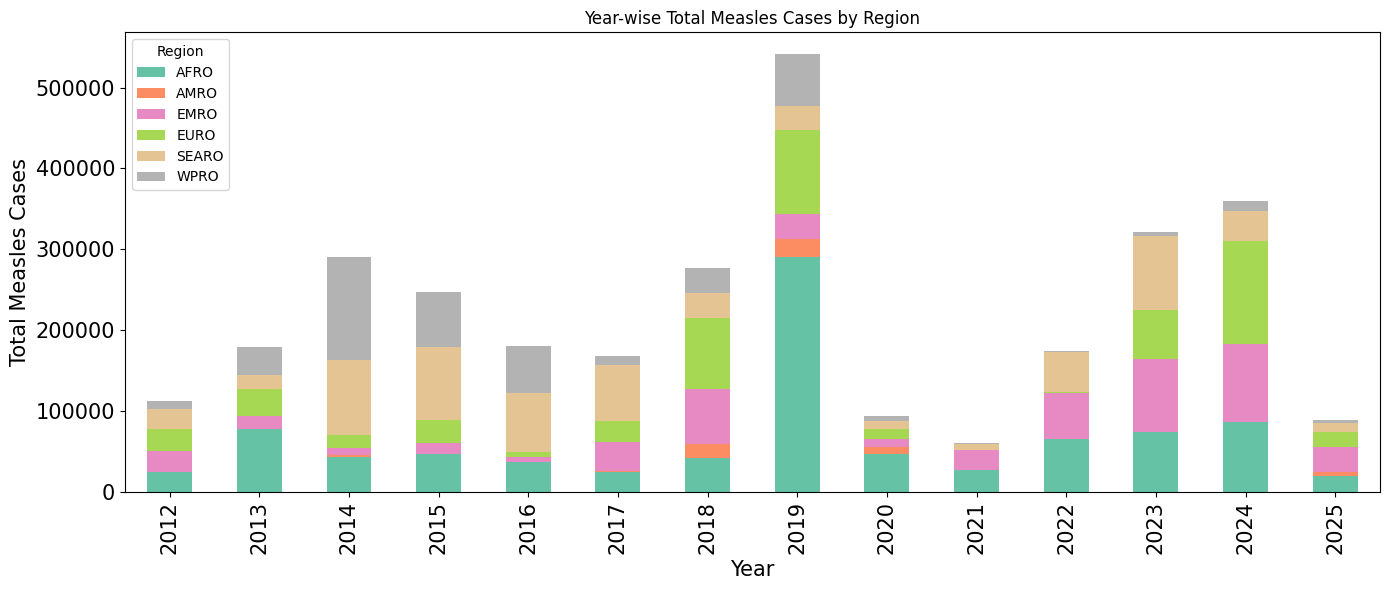

In [ ]:
# Group by year and region, sum total measles cases
year_region = cases_year.groupby(["year", "region"])["measles_total"].sum().unstack(fill_value=0)

num_regions = year_region.shape[1]
colors = cm.Set2(np.linspace(0, 1, num_regions))

# Plot as stacked bar
year_region.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 6),
    title="Year-wise Total Measles Cases by Region",
    color=colors
)

# Set Plot sepcifications
plt.ylabel("Total Measles Cases", size=15)
plt.xlabel("Year", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(title="Region", loc="upper left")
plt.tight_layout()

# Display plot
plt.show()

Observations: 
- African region (AFRO) has been the most affected in year 2019 which saw the highest number of cases between 2012 and mid-2025.
- Regions like EMRO, EURO, and SEARO have seen significant case surge in recent years.
- Western Pacific region (WPRO) has reported significantly reduced cases.
- American region (AMRO) shows the lowest or negligible cases throughout.

#### 4.d. Region-wise composition of measles cases

<AxesSubplot: title={'center': 'Region-wise Composition of Measles Cases'}, xlabel='region'>

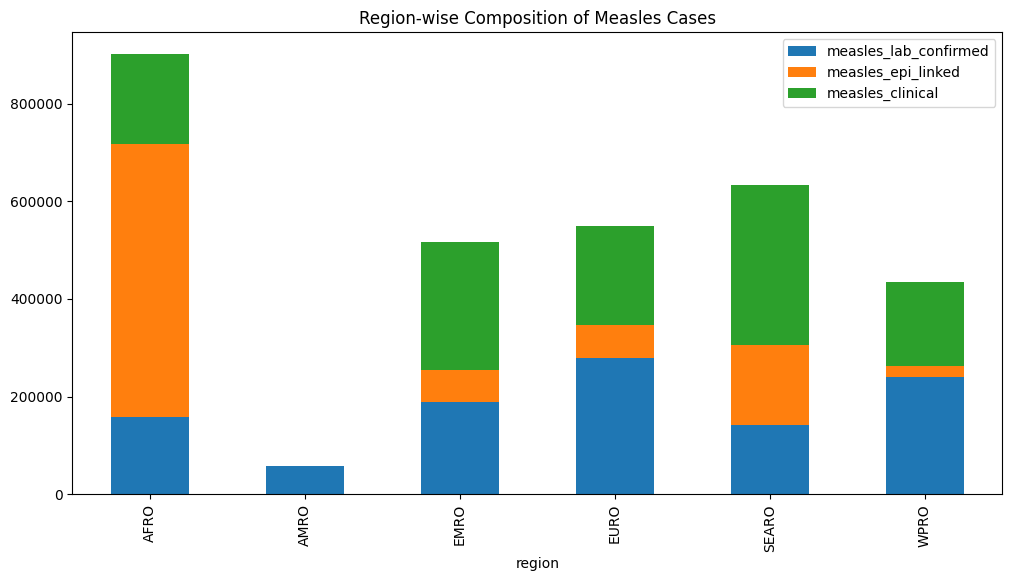

In [12]:
# Group by region and sum the components
region_components = cases_year.groupby("region")[["measles_lab_confirmed", "measles_epi_linked", "measles_clinical"]].sum()

# Plot
region_components.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    title="Region-wise Composition of Measles Cases"
)


Observations:
- African region (AFRO) has reported a high-proportion of epi-linked cases.
- American region (AMRO) has reported only lab-confirmed cases, which could be indicative of better healthcare surveillance systems (provided there is no missing data for other case classifications).
- EMRO, EURO, SEARO, and WPRO regions have significant proportions of both lab-confirmed and clinical cases, with SEARO region having a significant proportion of epi-linked cases as well.

#### 4.e. Measles case composition across Regions over Years

As there is a lot information when we see case compositions across each region over the years, an interactive plot using Plotly has been employed for better visualisation and interpretation of the results.

In [ ]:
# Group the data by region, year, and case composition
grouped = cases_year.groupby(["region", "year"])[
    ["measles_lab_confirmed", "measles_epi_linked", "measles_clinical"]].sum().reset_index()

# Define regions and their full names for interpretation
regions = grouped["region"].unique()

region_full_names = {
    "AFRO": "AFRO - African Region (Sub-Saharan Africa)",
    "AMRO": "AMRO - Region of the Americas (North, Central & South America)",
    "EMRO": "EMRO - Eastern Mediterranean Region (Middle East, North Africa, parts of South Asia)",
    "EURO": "EURO - European Region (Europe and parts of Central Asia)",
    "SEARO": "SEARO - South-East Asia Region (India, Indonesia, Thailand, etc.)",
    "WPRO": "WPRO - Western Pacific Region (China, Australia, Japan, Philippines, etc.)"
}

# Create one figure
fig = go.Figure()

# # Add traces for the first region only
first_region = regions[0]
df_r = grouped[grouped["region"] == first_region]

fig.add_trace(go.Bar(name="Lab Confirmed", x=df_r["year"], y=df_r["measles_lab_confirmed"], marker_color="steelblue"))
fig.add_trace(go.Bar(name="Epi Linked", x=df_r["year"], y=df_r["measles_epi_linked"], marker_color="#d77850"))
fig.add_trace(go.Bar(name="Clinical", x=df_r["year"], y=df_r["measles_clinical"], marker_color="#43D2AF"))

# Make it stacked
fig.update_layout(barmode="stack")

# Add dropdown buttons for each region
dropdown_buttons = []

# for region in regions:
for i, region in enumerate(regions):
    df_region = grouped[grouped["region"] == region]
    visibility = [False] * (3 * len(regions))  # 3 traces per region
    i = list(regions).index(region)
    visibility[i*3:i*3+3] = [True, True, True]

    dropdown_buttons.append(dict(
        label=region,
        method="update",
        args=[{"y": [
                    df_region["measles_lab_confirmed"],
                    df_region["measles_epi_linked"],
                    df_region["measles_clinical"]
                ],
               "x": [df_region["year"]] * 3,
               "visible": [True] * 3
              },
              {"title": f"Measles Case Composition Over Years - {region}"}
        ]
    ))

# Final layout update
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=dropdown_buttons,
        direction="down",
        x=1.15,
        y=1.15
    )],
    title=f"Measles Case Composition Over Years - {region_full_names[first_region]}",
    xaxis_title="Year",
    yaxis_title="Number of Cases",
    legend_title="Case Type",
    height=500,
    xaxis=dict(
        tickmode='linear',
        tick0=grouped["year"].min(),
        dtick=1
    )
)

# Display the interactive plot
fig.show()

# Save the plot as an html file
fig.write_html("measles_cases_region.html")


Observations:
- African region shows a high proportion of epi-linked cases throughout and a low proportion of lab-confirmed cases, indicating need for improvements in their disease surveillance systems.
- American region shows that almost all cases are lab-confirmed cases, with some epi-linked cases in 2025, suggesting that their healthcare surveillance system is better than that of all the other regions.
- Eastern Mediterranean region shows a high proportion of clinical cases.
- European and South-East Asian regions show an increase in the lab-confirmed cases in recent years, reflecting improvements in their healthcare surveillance systems.

#### 4.e. Comparison of Total Measles Cases and Average Measles Incidence per 1 Million Population by Region

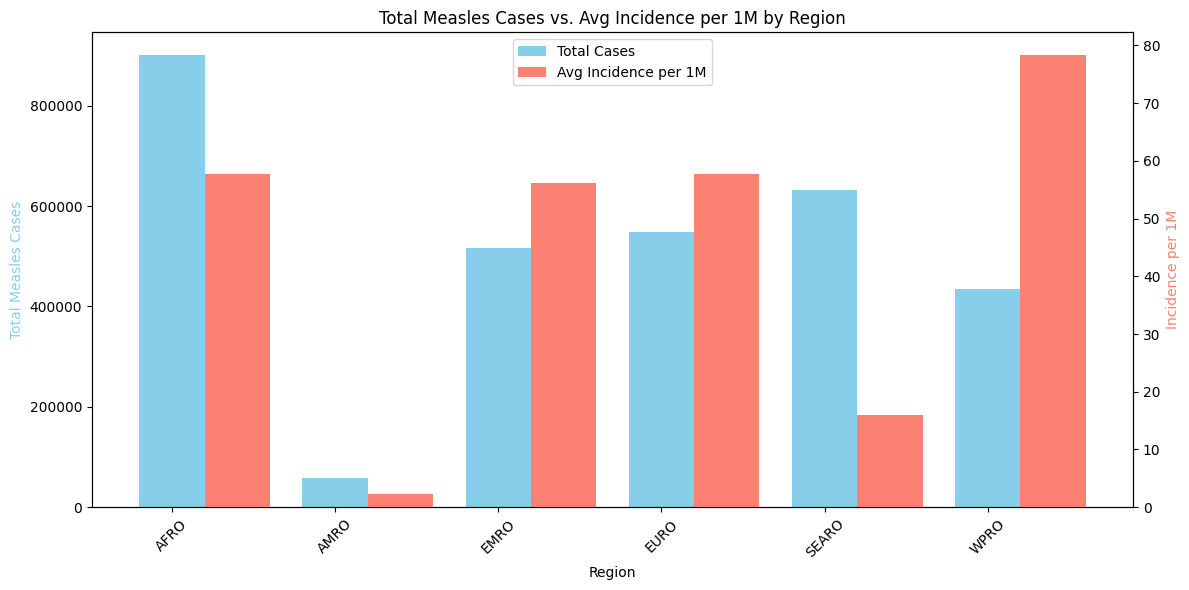

In [70]:
# Prepare data
total_cases = cases_year.groupby("region")["measles_total"].sum()
avg_incidence = cases_year.groupby("region")["measles_incidence_rate_per_1000000_total_population"].mean()

regions = total_cases.index 
x = range(len(regions))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar for total cases
bar1 = ax1.bar(x, total_cases, width=0.4, label="Total Cases", align="center", color="skyblue")
ax1.set_ylabel("Total Measles Cases", color="skyblue")
ax1.set_xlabel("Region")
ax1.set_xticks(x)
ax1.set_xticklabels(regions, rotation=45)

# Twin axis for incidence
ax2 = ax1.twinx()
bar2 = ax2.bar([i + 0.4 for i in x], avg_incidence, width=0.4, label="Avg Incidence per 1M", align="center", color="salmon")
ax2.set_ylabel("Incidence per 1M", color="salmon")

# Add title and legend
plt.title("Total Measles Cases vs. Avg Incidence per 1M by Region")
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()

Observations:
- Western Pacific region showed a very low number of cases but the rate of infection per person is relatively higher as the population is smaller or more concentrated, particularly as compared to the African region which shows highest number of cases but it also has a very large population.
- South-East Asian region also shows a relatively lower incidence per capita (per 1M population) in contrast to a high number of total cases.